In [1]:
# Adaptative Scheme Implementation
# Scheme
# 1. Define ODE f = f(x,t)
# 2. Set initial conditions y0,t0
# 3. Choose initial step size: h0
# 4. Set error tolerance

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Define function that incorporates a a quadratic term as a drag
g = 9.8
c_d=.45
rho=1
area= 1.26*10**-3 #cross sectional area of ping pong ball in m^2
mass=2.7*10**-3 #mass of ping pong ball in kg
gamma = .5*(1/mass)*rho*area*c_d

def drag(v_):
  """
  Function that incorporates a quadratic term as a drag
  Parameters
  ----------
  v_ : Float
        Value of v
  g : Float
        Value of g
  """
  return gamma*np.square(v_) - g

# Implementing solver as a function
def adaptative_drag(f, t0, tN, N, eps=0.9):
  """
  Function that implements a simple adaptative scheme for ODEs
  Parameters
  ----------
  f : Function
        Function that incorporates a quadratic term as a drag
  t0 : Float

  tN : Float
        Final time
  N : Integer
        Number of steps
  eps : Float
        Error tolerance
  """
  t = np.linspace(t0, tN, N)
  v = np.zeros(N)
  y = np.zeros(N)
  hmax = 1.0
  hmin = 0.5
  h = (tN-t0)/N
  for n in range(1,N):
    vn1    = v[n-1] + h*f(v[n-1])
    vn_int = v[n-1] + 0.5*h*f(v[n-1]) 
    vn2    = vn_int + 0.5*h*f(vn_int)
    if abs(vn2 - v[n]) < eps:
      v[n] = vn1
      h    = min(2.0*h, hmax)
    else:
      h = max(0.5*h, hmax)
    y[n] = y[n-1] + v[n]*h
  return t, y, v

In [10]:
# Define initial conditions and number of steps
t0 = 0
tf = 0.5
N  = 50
# Solve the ODE
solver_drag = adaptative_drag(drag,t0,tf, N)

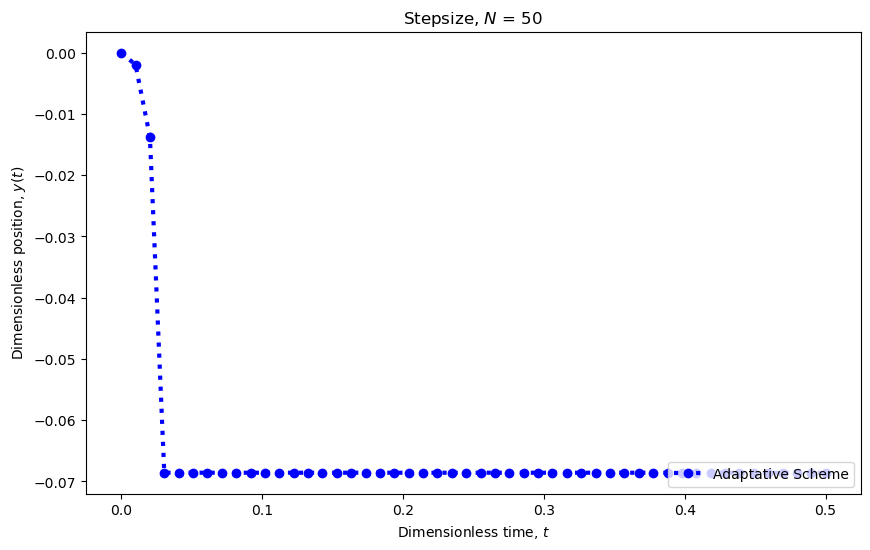

In [12]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(solver_drag[0],solver_drag[1],':bo' , linewidth=3.0,label=r'Adaptative Scheme')
plt.ylabel(r'Dimensionless position, $y(t)$')
plt.xlabel(r'Dimensionless time, $t$')
plt.title(r'Stepsize, $N$ = %i' % 50)
plt.legend(loc=4)
plt.show()